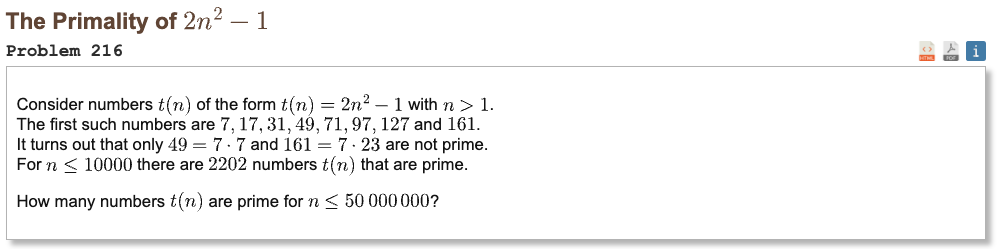

## Initial approach

* we count numbers of the form 2n² − 1 that are prime for n from 2 to 50,000,000
* these numbers get very large, so checking each one directly would be too slow
* instead of testing the numbers themselves, we work on the n values using a sieve
* a number 2n² − 1 is divisible by a prime p only when 2n² ≡ 1 mod p
* this condition gives at most two repeating patterns for n modulo p
* for each such pattern, we mark all matching n values as composite
* if 2n² − 1 happens to be exactly p, we unmark it because it is actually prime

In [1]:
import math

def sieve_primes(limit):
    if limit < 2:
        return []
    size = limit // 2 + 1
    is_comp = bytearray(size)
    primes = [2]
    r = int(limit**0.5)
    for i in range(3, r + 1, 2):
        if not is_comp[i // 2]:
            step = i
            start = i * i
            for j in range(start, limit + 1, 2 * step):
                is_comp[j // 2] = 1
    for i in range(3, limit + 1, 2):
        if not is_comp[i // 2]:
            primes.append(i)
    return primes

def legendre_symbol(a, p):
    return pow(a, (p - 1) // 2, p)

def tonelli_shanks(n, p):
    if n == 0:
        return 0
    if p == 2:
        return n
    if legendre_symbol(n, p) != 1:
        return None
    if p % 4 == 3:
        return pow(n, (p + 1) // 4, p)

    q = p - 1
    s = 0
    while q % 2 == 0:
        q //= 2
        s += 1

    z = 2
    while legendre_symbol(z, p) != p - 1:
        z += 1

    m = s
    c = pow(z, q, p)
    t = pow(n, q, p)
    r = pow(n, (q + 1) // 2, p)

    while t != 1:
        i = 1
        t2i = (t * t) % p
        while i < m and t2i != 1:
            t2i = (t2i * t2i) % p
            i += 1
        b = pow(c, 1 << (m - i - 1), p)
        r = (r * b) % p
        t = (t * b * b) % p
        c = (b * b) % p
        m = i
    return r

def count_primes_tn(N):
    limit = int(math.isqrt(2 * N * N - 1))
    primes = sieve_primes(limit)

    marked = bytearray(N + 1)
    marked[0] = 1
    if N >= 1:
        marked[1] = 1

    for p in primes:
        if p == 2:
            continue

        inv2 = (p + 1) // 2
        r = tonelli_shanks(inv2, p)
        if r is None:
            continue

        r1 = r % p
        r2 = (-r) % p
        roots = [r1] if r1 == r2 else [r1, r2]

        skip_n = 0
        n0 = math.isqrt((p + 1) // 2)
        if n0 >= 2 and 2 * n0 * n0 - 1 == p:
            skip_n = n0

        for root in roots:
            start = root
            if start < 2:
                start += ((2 - start + p - 1) // p) * p
            for n in range(start, N + 1, p):
                marked[n] = 1

        if skip_n:
            marked[skip_n] = 0

    return (N - 1) - sum(marked[2:])

def solve():
    N = 50_000_000
    result = count_primes_tn(N)
    print("Result:", result)

In [2]:
%%time
solve()

Result: 5437849
CPU times: user 17.5 s, sys: 104 ms, total: 17.6 s
Wall time: 17.6 s
